In [1]:
#Import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
#Import, and slice data (2nd sample group first 100 responses from revised survey, not including 1st sample group of 20)

df = pd.read_csv("UMass Sustainability Initiative.csv", sep=",")
df = df.iloc[0:100]

In [3]:
#Data Cleaning

df.rename(columns = { 'How old are you?':'Age', 'What is your gender?':'Gender', 'What occupation do you hold in the University?':'Occupation',
                     'What year are you?':'Year', 'What is your major?':'Major',
                     'Do you live on campus?':'On Campus', 'If you do live on campus, where do live?':'Location',
                     'How often do you recycle?':'Frequency', "Why do you recycle? (Don't answer if you don't)":'Reasoning',
                     'Are the recycling rules on campus clearly presented?':'Rules', 
                     'If not, if the recycling rules were clearer would you be more likely to recycle?':'Likelihood',
                     'Do you look for the recycle symbol before recycling?':'Symbol', 'What items do you usually recycle?':'Items',
                     'Did the survey overall make you think about your own personal recycling methods and habits?':'Habits',
                     'Whats the best way to reach you for the prize draw? (Email, Phone, etc. )':'Prize'}, inplace = True)

df.fillna('No', inplace=True)

#Splitting strings into arrays
df['Reasoning'] = df['Reasoning'].str.split(";", expand = False)
#df['Items'] = df['Items'].str.split(";", expand = False)

#Replacing Majors with relevant groups, by engineers, Computer Science, Business 
df['Major'].replace(dict.fromkeys(['CIS', 'Computer Science', 'Computer science', 'Computer science'], 
                                  'College of Engineering'), inplace = True)
df['Major'].replace(dict.fromkeys(['MIS', 'Accounting', 'Marketing'], 'College of Business'), inplace = True)

df.Age = df.Age.astype(int)

df.head(3)

,Timestamp,Age,Gender,Occupation,Year,Major,On Campus,Location,Frequency,Reasoning,Rules,Likelihood,Symbol,Items,Habits,"Whats the best way to reach you for the prize draw? (Enter your Email, Phone, etc. )"
0,2020/02/18 4:03:42 PM AST,20,Male,No,Sophomore,College of Engineering,Yes,Birch,Often,"[Sustainability, Ease of Access]",Yes,Yes,Yes,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,3,No
1,2020/02/18 4:05:49 PM AST,20,Male,No,Junior,College of Engineering,Yes,Aspen,Always,"[Sustainability, Habit]",No,Yes,No,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,4,jegan2@umassd.edu
2,2020/02/18 4:09:10 PM AST,23,Male,No,Junior,College of Engineering,No,No,Always,[Habit],Yes,No,No,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,2,No


In [4]:
#basic data analysis for quantitive data, habits and age distribution

def distribution(df):
    print(f'The mean is {df.mean()} the Standard Erorr of the mean is {stats.sem(df, axis=None, ddof=0)}')
    print(f'The variance is {statistics.variance(df)} the standard deviation is {df.std()}')
    print(f'The min is {df.min()}, Q1 is {np.quantile(df, .25)}, median is {df.median()}, Q3 is {np.quantile(df, .75)}, max is {df.max()}')
    print(f'Skewness: {stats.skew(df)}')
        
distribution(df['Habits'])


The mean is 3.67 the Standard Erorr of the mean is 0.11580587204455565
The variance is 1.3546464646464647 the standard deviation is 1.1638928063384812
The min is 1, Q1 is 3.0, median is 4.0, Q3 is 5.0, max is 5
Skewness: -0.8025214276103186


In [5]:
#basic data analysis for qualtitve data, Major Location Frequency Reasoning Items ... etc

#to be filled in...

In [6]:
#Sorting entries (potential group of interest could be people with low habits, majority of people had high schore for habits)

df.sort_values('Major', ascending=True)

,Timestamp,Age,Gender,Occupation,Year,Major,On Campus,Location,Frequency,Reasoning,Rules,Likelihood,Symbol,Items,Habits,"Whats the best way to reach you for the prize draw? (Enter your Email, Phone, etc. )"
94,2020/02/18 5:11:04 PM AST,21,Male,No,Junior,Accounting,No,No,Sometimes,[Ease of Access],I didn't know there were any recycling rules!,Yes,Yes,Paper;Cardboard;Plastic Bottles;Plastic Bags;G...,5,7742221673
49,2020/02/18 4:44:21 PM AST,18,Male,No,Freshman,Biochem,Yes,Maple,Often,[Sustainability],No,Yes,Yes,Paper;Cardboard;Plastic Bottles;Plastic Bags;G...,3,7815882143
68,2020/02/18 4:50:02 PM AST,18,Male,No,Sophomore,Bioengineering,Yes,Oak Glen,Often,[Sustainability],No,Yes,Yes,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,3,jarevalo@umassd.edu
95,2020/02/18 5:11:22 PM AST,19,Female,No,Sophomore,Bioengineering,Yes,Oak Glen,Always,"[Sustainability, Ease of Access, Habit]",No,Yes,Yes,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,5,Avanvoorhis2@umassd.edu
62,2020/02/18 4:49:35 PM AST,19,Female,No,Sophomore,Bioengineering,No,No,Often,[Habit],Yes,No,No,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,4,kbernier1@umassd.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2020/02/18 4:25:41 PM AST,20,Female,No,Junior,cjs,Yes,Ivy,Sometimes,[Habit],Yes,Yes,No,Paper;Cardboard;Plastic Bottles;Plastic Bags;G...,3,7815133129
30,2020/02/18 4:39:06 PM AST,21,Female,No,Junior,health and society,Yes,Willow,Sometimes,[Sustainability],No,Yes,Yes,Paper;Plastic Bottles;Plastic Bags;Aluminum Cans,4,email amaizat@umassd.edu
34,2020/02/18 4:39:57 PM AST,19,Female,No,Freshman,health and society,Yes,Elmwood,Always,[Habit],Yes,Yes,Yes,Paper;Cardboard;Plastic Bottles,5,tianipw33@gmail.com
53,2020/02/18 4:48:28 PM AST,18,Female,No,Freshman,nursing,Yes,Elmwood,Often,[Sustainability],Yes,No,Yes,Paper;Cardboard;Plastic Bottles;Plastic Bags;G...,1,No


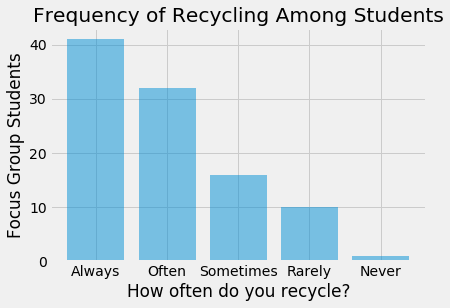

In [7]:
#Initial data analysis with Bar plots on recycling frequency (Focus Group Students)
#we can assume that all first 100 surveys are students since we manually surveyed students with QR codes on our phones

plt.style.use('fivethirtyeight')
x = np.arange(5)

plt.bar(x, df['Frequency'].value_counts(), align='center', alpha=0.5)
plt.xticks(x, ('Always', 'Often', 'Sometimes', 'Rarely', 'Never'))
plt.title('Frequency of Recycling Among Students')
plt.xlabel('How often do you recycle?')
plt.ylabel('Focus Group Students')
plt.show()
#cumulative frequency would be cool on the graph above, Pareto Chart

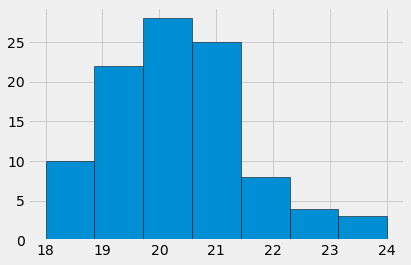

20    28
21    25
19    22
18    10
22     8
23     4
24     3
Name: Age, dtype: int64

In [11]:
#"histogram" and bar plot of Age 

plt.hist(df['Age'], bins = 7, edgecolor='black')
plt.show()

#above plot isn't actually a histogram its a bar graph but I'm having difficult formatting age on a bar plot
#Using value counts orders the series by frequency which isn't wanted waiting to format graph labels 
#below code doesn't work
#plt.bar(x, df['Age'].value_counts(), edgecolor='black')
#plt.show()

#useful to consider
df['Age'].value_counts()

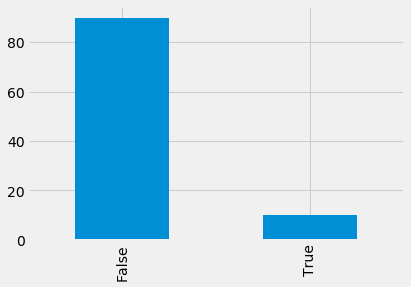

In [8]:
#Data analysis on Items column, specifically electronic subset
#group by people who did and didn't recycle electronics
#plt.rcParams['font.size'] = 16.0
#mosaic(df, ['Frequency', 'Habits'])

#Not sure how to use plt here had to use plot which I don't think I can format it
df1 = df.Items.str.contains(pat = 'Electronics') 
df1.value_counts()
df1.value_counts().plot(kind='bar')



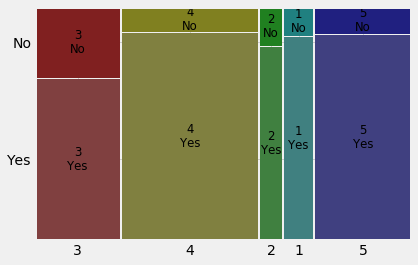

In [19]:
#mosaic plot
m = df.groupby(["Symbol", "Likelihood"]).sum()

mosaic(df, ["Habits", "Symbol"])
plt.show()